# Perkenalan

## Team :
1. Nichoulaus Verdhy P - PYTN-KS011-023
2. Tassyirifiyya - PYTN-KS011-012
3. Isma - PYTN-KS011-008

Python for Data Science - Studi Independen - Kampus Merdeka

## Latar Belakang

Dataset WeatherAUS adalah dataset yang berisi data cuaca di beberapa kota di Australia selama beberapa tahun. Data diambil dari Australian Bureau of Meteorology dan terdiri dari informasi cuaca harian seperti suhu, kelembaban, kecepatan angin, dan curah hujan, Dataset ini sering digunakan dalam analisis prediksi cuaca.

Tujuan utama dari dataset ini adalah untuk memprediksi apakah akan terjadi hujan pada hari berikutnya berdasarkan data cuaca pada hari sebelumnya. Variabel target dalam dataset ini adalah "RainTomorrow" yang menunjukkan apakah akan hujan atau tidak pada hari berikutnya. Selain itu, dataset ini juga berisi beberapa variabel input seperti lokasi, tanggal, suhu maksimum dan minimum, kelembaban, tekanan udara, dan kecepatan angin.

Beberapa contoh analisis dan prediksi yang dapat dilakukan dengan dataset WeatherAUS adalah:

1. Prediksi apakah akan turun hujan pada hari berikutnya 

2. Analisis hubungan antara curah hujan dan faktor-faktor cuaca lainnya seperti suhu, kelembapan, dan arah angin 

3. Analisis pola cuaca di berbagai wilayah di Australia

4. Prediksi curah hujan bulanan di suatu wilayah di Australia 

5. Analisis perubahan cuaca di Australia selama sepuluh tahun terakhir 

Dataset WeatherAUS penting karena dapat membantu dalam memprediksi cuaca di masa depan dan membantu orang dalam membuat keputusan yang tepat, seperti memilih pakaian yang sesuai, membawa payung Dan lain-lain

## Objektif

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:

● Mampu memahami konsep Classification dengan Logistic Regression dan SVM

● Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM

● Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

# Import Pustaka

In [1]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = 5
pd.options.display.max_columns = None

#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata


# Data Loading

## Memanggil Data set

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Melihat ukuran data(baris, kolom)

In [4]:
df.shape

(145460, 23)

## Pengecekan Nama Kolom

In [5]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

## Deskriptif Statistik

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.00000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.00000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.03523,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.00000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.00000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.00000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.00000,40.200000,46.70000


## Tipe Data


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Penjelasan Per kolom

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

## Pengecekan Missing Value

In [8]:
df.isna().sum()

Date               0
Location           0
                ... 
RainToday       3261
RainTomorrow    3267
Length: 23, dtype: int64

## Penghitungan Persentasi Missing Value

In [9]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df[col])
    perc_missing = (null_count / total_count) * 100
    
    print(f"Kolom {col}:")
    print(f"Jumlah nilai null: {null_count}")
    print(f"Total data: {total_count}")
    print(f"Persentase missing value: {perc_missing:.2f}%\n")

Kolom Date:
Jumlah nilai null: 0
Total data: 145460
Persentase missing value: 0.00%

Kolom Location:
Jumlah nilai null: 0
Total data: 145460
Persentase missing value: 0.00%

Kolom MinTemp:
Jumlah nilai null: 1485
Total data: 145460
Persentase missing value: 1.02%

Kolom MaxTemp:
Jumlah nilai null: 1261
Total data: 145460
Persentase missing value: 0.87%

Kolom Rainfall:
Jumlah nilai null: 3261
Total data: 145460
Persentase missing value: 2.24%

Kolom Evaporation:
Jumlah nilai null: 62790
Total data: 145460
Persentase missing value: 43.17%

Kolom Sunshine:
Jumlah nilai null: 69835
Total data: 145460
Persentase missing value: 48.01%

Kolom WindGustDir:
Jumlah nilai null: 10326
Total data: 145460
Persentase missing value: 7.10%

Kolom WindGustSpeed:
Jumlah nilai null: 10263
Total data: 145460
Persentase missing value: 7.06%

Kolom WindDir9am:
Jumlah nilai null: 10566
Total data: 145460
Persentase missing value: 7.26%

Kolom WindDir3pm:
Jumlah nilai null: 4228
Total data: 145460
Persentase 

## Pengecekan Data yang duplikat untuk semua kolom

In [10]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [11]:
df.duplicated().sum()

0

# Data Cleansing

## Mengubah Format DataTime

In [12]:
df["Date"]=pd.to_datetime(df["Date"])

### Melakukan pengecekan ulang missing data

In [13]:
df.isna().sum()

Date               0
Location           0
                ... 
RainToday       3261
RainTomorrow    3267
Length: 23, dtype: int64

### menghilangkan missing value pada dataset, melakukan normalisasi pada dataset dengan cara melakukan dropping nilai null pada variabel target terlebih dahulu.

In [14]:
#Dropping the null values in dependent variable
#Use df1 veriable for train data
df = df[df['RainTomorrow'].notna()]   #This is our training data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Selanjutnya melakukan pengelompokkan category variable data dan melakukan pengisian nilai

In [15]:
# find categorical variables

category = [var for var in df.columns if df[var].dtype=='O']

print('There are {} category variables\n'.format(len(category)))

print('Category Variables :', category)

There are 6 category variables

Category Variables : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
category

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [17]:
df[category].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [18]:
#replacing null values in categorical variables with mode value
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

Selanjutnya melakukan pengelompokkan numerik data dan pengisian nilai

In [19]:
# find categorical variables

numerik = [var for var in df.columns if df[var].dtype!='O']

print('There are {} category variables\n'.format(len(numerik)))

print('categorical numerik :', numerik)

There are 17 category variables

categorical numerik : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [20]:
numerik

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [21]:
df[numerik].head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [22]:
#filling the null values in numerical variable with mean
df = df.fillna(df.mean())
df.head()

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14304\3809857404.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\USER DK\AppData\Local\Temp\ipykernel_14304\3809857404.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [23]:
df.isnull().sum()

Date            0
Location        0
               ..
RainToday       0
RainTomorrow    0
Length: 23, dtype: int64

# Explorasi data Analist

## Lokasi dengan RainTomorrow

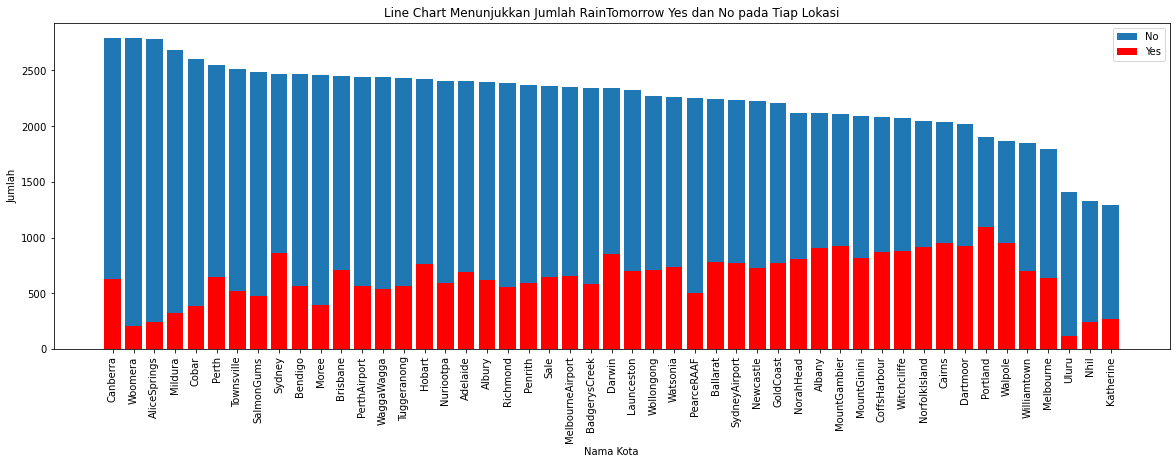

In [24]:
# Hitung jumlah kejadian "RainTomorrow" yang sama dengan "Yes" untuk setiap lokasi
df_rain_tomorrow_yes = df.loc[df['RainTomorrow']=='Yes'].groupby('Location')['RainTomorrow'].count().reset_index(name='Yes')
df_rain_tomorrow_yes = df_rain_tomorrow_yes.sort_values(by='Yes', ascending=False)

df_rain_tomorrow_no = df.loc[df["RainTomorrow"]=="No"].groupby("Location")["RainTomorrow"].value_counts().reset_index(name="No")
df_rain_tomorrow_no = df_rain_tomorrow_no.sort_values(by="No", ascending=False)

# Buat figure dengan ukuran 10 x 6 inci
fig, ax = plt.subplots(figsize=(20, 6))


# Buat line chart untuk jumlah No
ax.bar(df_rain_tomorrow_no['Location'], df_rain_tomorrow_no['No'], label='No')

# Buat line chart untuk jumlah Yes
ax.bar(df_rain_tomorrow_yes['Location'], df_rain_tomorrow_yes['Yes'], label='Yes',color='red')



# Atur judul, label sumbu-x dan sumbu-y
ax.set_title('Line Chart Menunjukkan Jumlah RainTomorrow Yes dan No pada Tiap Lokasi')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')

# Atur label untuk setiap line chart
ax.legend()

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

# Tampilkan plot
plt.show()


_Keterangan_

Dari data yang ada diatas, menjelaskan bahwa mayoritas daerah daerah tidak mengalami hujan untuk besok harinya. Akan tetapi ada daerah juga yang akan mengalami besok hujan. Bisa kita lihat pada chart warna biru yang menunjukan jumlah data "NO" untuk rainTomorrow dan merah untuk jumlah data "YES" untuk daerah yang besoknya mengalami hujan. Sekarang kita akan ambil data yang memliki raintomorrow YES

 Top 5 YES 
        Location   Yes
33      Portland  1095
8         Cairns   950
43       Walpole   949
12      Dartmoor   922
22  MountGambier   920
 Top 5 NO 
        Location  Yes
16     Katherine  265
3   AliceSprings  244
25          Nhil  242
48       Woomera  202
41         Uluru  116


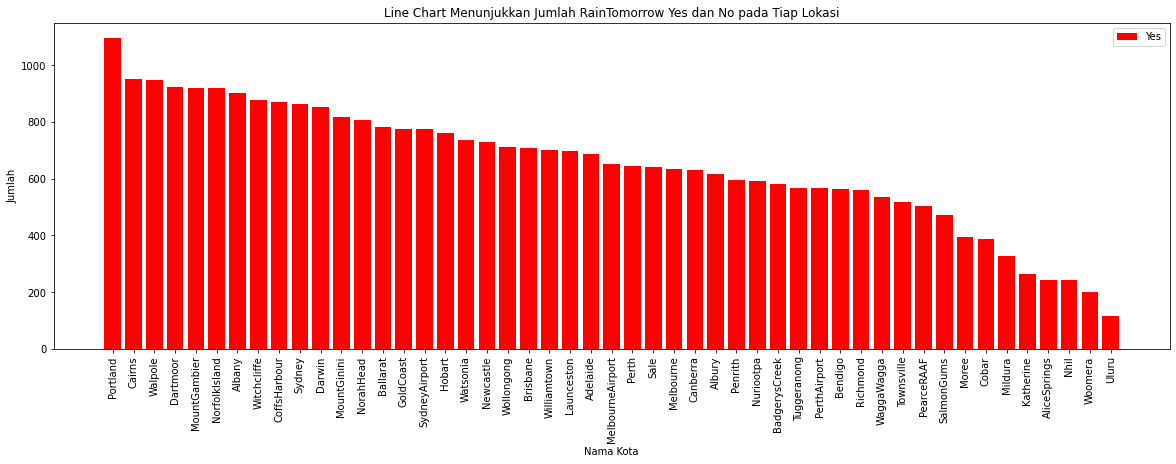

In [25]:
# Buat figure dengan ukuran 10 x 6 inci
fig, ax = plt.subplots(figsize=(20, 6))

# Buat line chart untuk jumlah Yes
ax.bar(df_rain_tomorrow_yes['Location'], df_rain_tomorrow_yes['Yes'], label='Yes',color='red')



# Atur judul, label sumbu-x dan sumbu-y
ax.set_title('Line Chart Menunjukkan Jumlah RainTomorrow Yes dan No pada Tiap Lokasi')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')

# Atur label untuk setiap line chart
ax.legend()

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

# Tampilkan plot
print(" Top 5 YES ")
print(df_rain_tomorrow_yes.head())
print(" Top 5 NO ")
print(df_rain_tomorrow_yes.tail())
plt.show()

_Keterangan_

Dari keterangan barchart diatas, ada daerah daerah yang memiliki prediksi raintomorrow tionggi. Diantara 5 terbesarnya adalah Prtland. Cairns. Walpole. Dartmoor, MountGambier. Dan untuk Daerah daerah yang prediksi besoknya tidak terjadi hujan diantaranya Katherine. AliceSprings, Nhil, Woomera dan uluru.

### Kesimpulan Dari Analisis Lokasi Dengan RainTomorrow

Dari kesimpulan data diatas, menunjukkan bahwa banyak daerah daerah yang memiliki prediksi hujan besoknya tinggi dan tidak. Untuk daerah yang memiliki prediksi rainTomowwor tinggi Prtland. Cairns. Walpole. Dartmoor, MountGambier. Hasil ini menunjukan bahwa feture / kolom lokasi dapat menjadi prediktor untuk feature/kolom RainTomorrow karena tingkat RainTomorrow pada setiap daerah berbeda, ada yang sangat tinggi, ada yang sangat rendah.

## Perbandingan MinTemp MaxTemp dengan RainTomorrow

In [26]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="Yes"].sort_values(by="MaxTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
64228,18.8,46.8,Yes
34937,22.7,46.4,Yes
105884,24.3,44.9,Yes
107342,26.2,44.9,Yes
125558,13.7,44.5,Yes


In [27]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="Yes"].sort_values(by="MinTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
98946,30.7,38.5,Yes
144900,30.2,39.5,Yes
70769,29.8,41.1,Yes
139638,29.7,32.3,Yes
144211,29.3,42.3,Yes


_Keterangan_

Dari tabel diatas menunjukan data data yang memiliki min max temperature yang prediksi hujan besoknya iya

In [28]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="No"].head().sort_values(by="MaxTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
4,17.5,32.3,No
3,9.2,28.0,No
2,12.9,25.7,No
1,7.4,25.1,No
0,13.4,22.9,No


In [29]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="No"].head().sort_values(by="MinTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
4,17.5,32.3,No
0,13.4,22.9,No
2,12.9,25.7,No
3,9.2,28.0,No
1,7.4,25.1,No


_Keterangan_

Dari tabel diatas menunjukan data data yang memiliki min max temperature yang prediksi hujan besoknya tidak

In [30]:
df.groupby("RainTomorrow")[["MinTemp","MaxTemp"]].mean()

,MinTemp,MaxTemp
RainTomorrow,,
No,11.898884,23.834771
Yes,13.181398,21.122737


<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

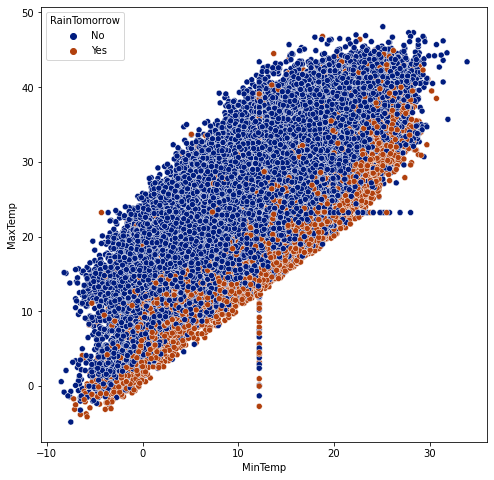

In [31]:
plt.figure(figsize = (8,8)) # ukuran 8 x 8
sns.scatterplot(x = 'MinTemp', y = 'MaxTemp', hue = 'RainTomorrow' , palette = 'dark',data = df) # digunakan untuk membuat scatter plot dengan sumbu-x dan sumbu-y dari kolom MaxTemp dan MinTemp. Hue diatur dengan kolom RainTomorrow dan menggunakan palet warna inferno.

_Keterangan_

Dari Scater plot diatas menunjukan keterangan nilai Min dan Max temperature yang menghasilkan prediksi  RainTomorrow Yes dan No

### Kesimpulan Analisis Perbandingan Min Max Temp dengan Rainfall

Hasil dari kesimpulan scater plot dan tabel diatas menunjukan, data yang diberikan pada tabel

## Perbandingan anatara ranfall today dengan RainTomorrow

Text(0.5, 1.0, 'Rain Today - Rain Tomorrow')

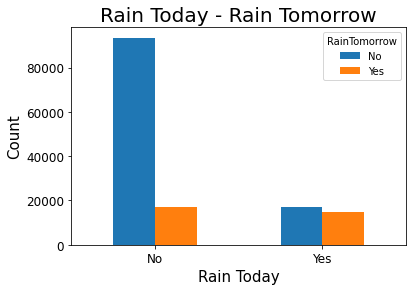

In [32]:
Today_Tomo_plot = pd.crosstab(df['RainToday'], df['RainTomorrow'])

plt.rcParams["figure.figsize"] = (6,4)

Today_Tomo_plot.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)

### Kesimpulan

## Perbandingan Evaporation Sunshine dengan RainTomorrow

In [33]:
Evasun_Raintomorrow_YES = df.loc[df["RainTomorrow"]=="Yes"].groupby("RainTomorrow")[["Evaporation","Sunshine"]].value_counts().reset_index(name="Total")

In [34]:
Evasun_Raintomorrow_YES.head()

,RainTomorrow,Evaporation,Sunshine,Total
0,Yes,5.469824,7.624853,13094
1,Yes,5.469824,0.000000,128
2,Yes,1.200000,7.624853,69
3,Yes,2.800000,0.000000,65
4,Yes,1.800000,0.000000,63


In [35]:
Evasun_Raintomorrow_NO = df.loc[df["RainTomorrow"]=="No"].groupby("RainTomorrow")[["Evaporation","Sunshine"]].value_counts().reset_index(name="Total")

In [36]:
Evasun_Raintomorrow_NO.head()

,RainTomorrow,Evaporation,Sunshine,Total
0,No,5.469824,7.624853,43790
1,No,8.000000,7.624853,489
2,No,4.000000,7.624853,358
3,No,2.000000,7.624853,203
4,No,6.000000,7.624853,191


<AxesSubplot:xlabel='Evaporation', ylabel='Sunshine'>

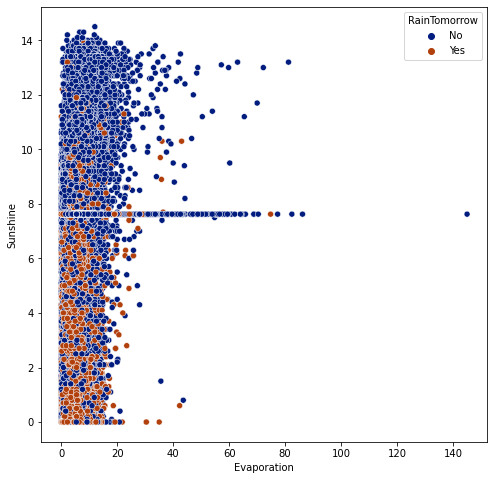

In [37]:
plt.figure(figsize = (8,8)) # ukuran 8 x 8
sns.scatterplot(x = 'Evaporation', y = 'Sunshine', hue = 'RainTomorrow' , palette = 'dark',data = df) # digunakan untuk membuat scatter plot dengan sumbu-x dan sumbu-y dari kolom MaxTemp dan MinTemp. Hue diatur dengan kolom RainTomorrow dan menggunakan palet warna inferno.

### Kesimpulan

## Perbandingan WindGustDir,WindDir9am,WindDir3pm dengan RainTomorrow

In [38]:
wind_Rt = df.loc[df["RainTomorrow"]=="Yes"].groupby("RainTomorrow")[["WindGustDir","WindDir9am","WindDir3pm"]].value_counts().reset_index(name="Total")


In [39]:
wind_Rt.head()

,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm,Total
0,Yes,W,N,SE,539
1,Yes,N,N,N,439
2,Yes,NNW,N,NNW,246
3,Yes,W,W,W,216
4,Yes,N,NNE,N,205


In [40]:
wind_Rt_no = df.loc[df["RainTomorrow"]=="No"].groupby("RainTomorrow")[["WindGustDir","WindDir9am","WindDir3pm"]].value_counts().reset_index(name="Total")


In [41]:
wind_Rt_no

,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm,Total
0,No,W,N,SE,1534
1,No,N,N,N,1115
...,...,...,...,...,...
3951,No,NE,S,SW,1
3952,No,NNE,SE,SW,1


# Data Preprocessing

In [42]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df['Location']= label_encoder.fit_transform(df['Location'])
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14304\1555318517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriks_korelasi = df.corr()


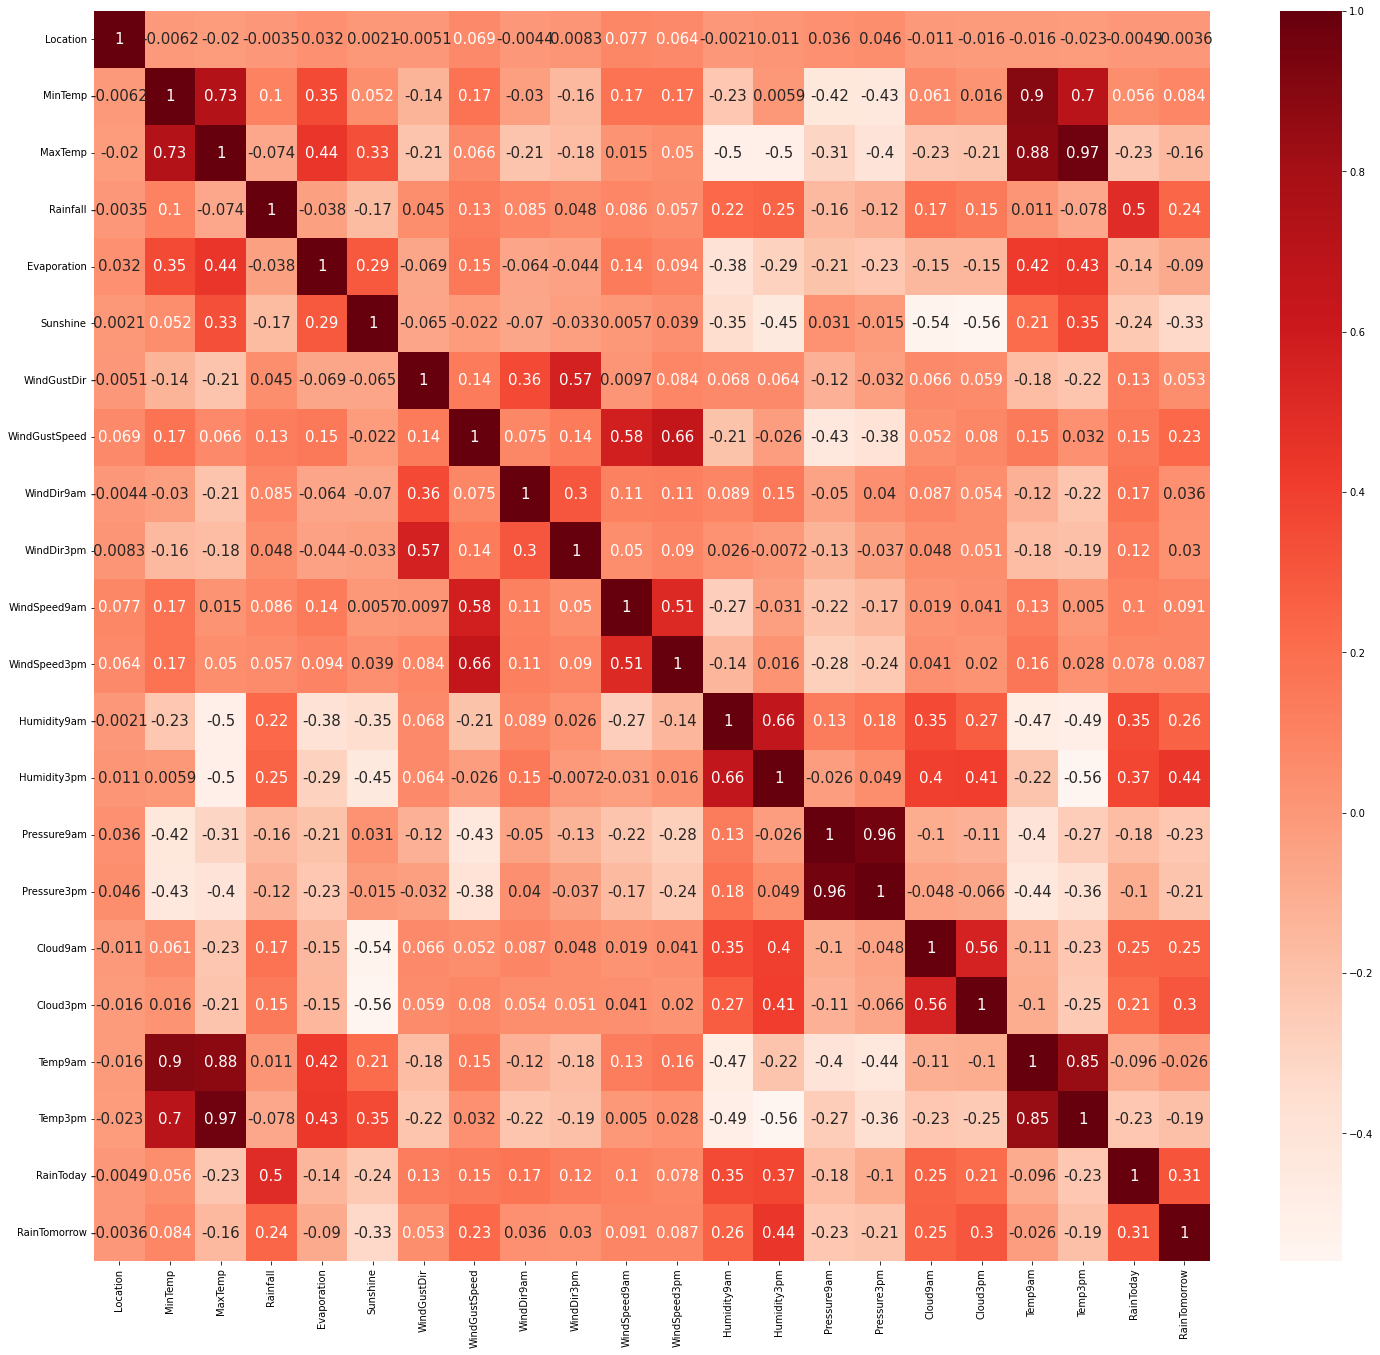

In [43]:
# cek korelasi antar variable independent
matriks_korelasi = df.corr()
plt.figure(figsize=(25,23))
sns.heatmap(matriks_korelasi, cmap='Reds', annot=True,annot_kws={'fontsize':15});

In [44]:
new_df =df[['Location','MinTemp','MaxTemp','Rainfall','Sunshine',"Evaporation",'WindGustDir','WindGustSpeed','WindDir9am','WindSpeed9am','Pressure9am','Humidity3pm',"Temp9am",'Cloud3pm','RainToday','RainTomorrow']]
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,Pressure9am,Humidity3pm,Temp9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,7.624853,5.469824,13,44.0,13,20.0,1007.7,22.0,16.9,4.503167,0,0
1,2,7.4,25.1,0.0,7.624853,5.469824,14,44.0,6,4.0,1010.6,25.0,17.2,4.503167,0,0
2,2,12.9,25.7,0.0,7.624853,5.469824,15,46.0,13,19.0,1007.6,30.0,21.0,2.000000,0,0
3,2,9.2,28.0,0.0,7.624853,5.469824,4,24.0,9,11.0,1017.6,16.0,18.1,4.503167,0,0
4,2,17.5,32.3,1.0,7.624853,5.469824,13,41.0,1,7.0,1010.8,33.0,17.8,8.000000,0,0


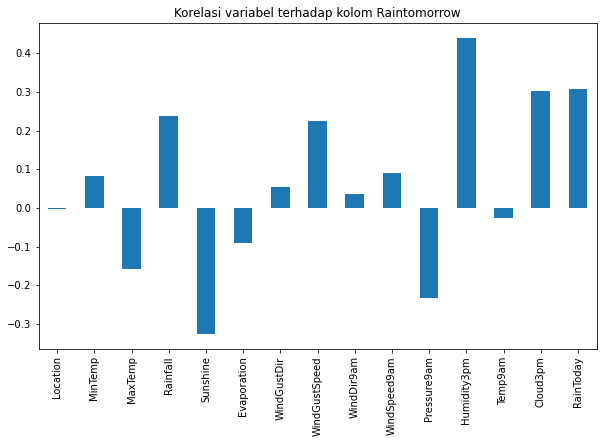

In [45]:
# Membuat correlation bar(mencari korelasi antara variable dependent dengan semua variable independent) plot dan correlation matrix(mencari korelasi antar variable independent)
fig,ax = plt.subplots(figsize=(10,6))
korelasi = new_df.drop(columns=['RainTomorrow'], inplace=False).corrwith(df.RainTomorrow)
korelasi.plot.bar(title='Korelasi variabel terhadap kolom Raintomorrow');

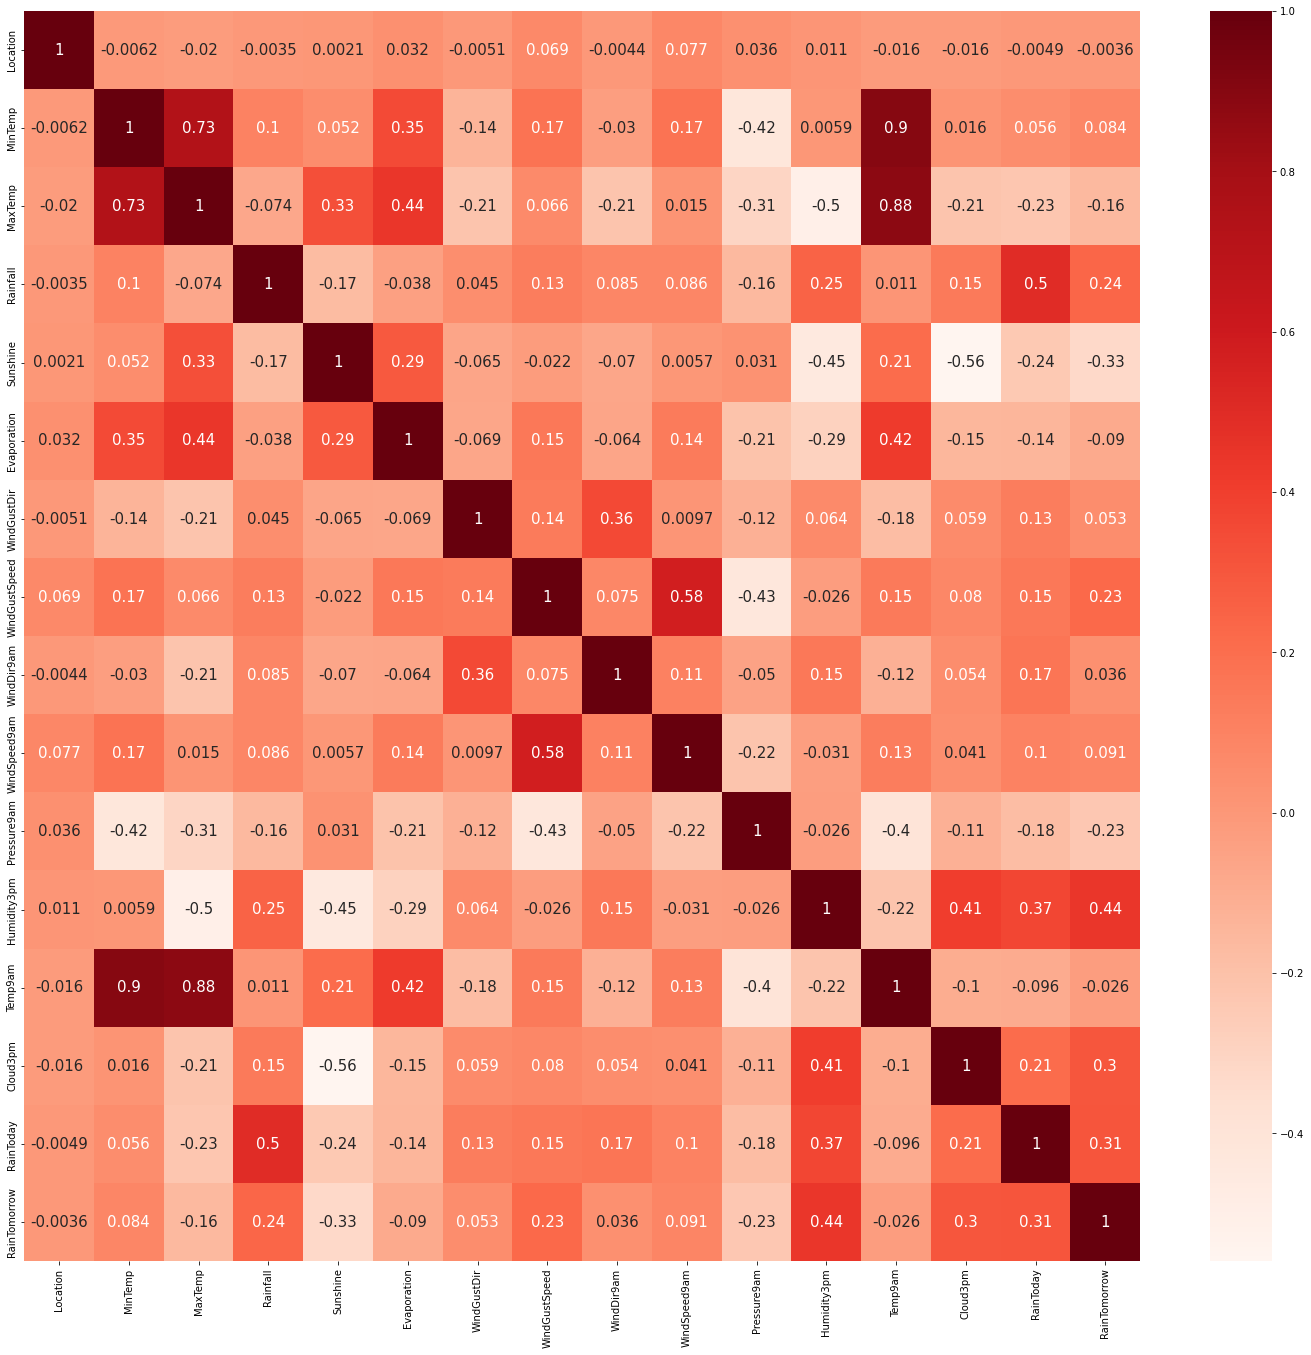

In [46]:
# cek korelasi antar variable independent
matriks_korelasi = new_df.corr()
plt.figure(figsize=(25,23))
sns.heatmap(matriks_korelasi, cmap='Reds', annot=True,annot_kws={'fontsize':15});

## Membuat Dataframe baru dengan jumlah label yes = no

In [49]:
countRT = new_df['RainTomorrow'].value_counts()
countRT

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [50]:
n = min(countRT)
n

31877

In [51]:
subset_yes = new_df[new_df['RainTomorrow'] == 1].sample(n=31877, random_state=42)
subset_no = new_df[new_df['RainTomorrow'] == 0].sample(n=31877, random_state=42)

In [52]:
new2_df = pd.concat([subset_yes, subset_no])

In [53]:
new2_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,Pressure9am,Humidity3pm,Temp9am,Cloud3pm,RainToday,RainTomorrow
126713,36,17.2,26.0,0.6,7.624853,5.469824,2,44.0,10,11.0,1017.653758,64.0,18.8,4.503167,0,1
120998,31,9.5,16.6,0.6,0.100000,1.200000,5,41.0,4,11.0,1009.100000,86.0,12.8,8.000000,0,1
20516,26,17.0,23.4,0.0,7.624853,5.469824,4,50.0,5,17.0,1015.700000,82.0,20.2,4.503167,0,1
63805,35,11.3,14.9,9.6,7.624853,5.469824,13,35.0,9,9.0,1007.000000,98.0,12.0,8.000000,1,1
41951,45,16.1,19.9,11.4,3.600000,14.600000,8,41.0,11,22.0,1019.900000,79.0,17.7,8.000000,1,1


In [54]:
new2_df.shape

(63754, 16)

# Pendefisian Model

In [55]:
lr = LogisticRegression()
svc = SVC()

# Pelatihan Model

In [56]:
x = new_df.drop(['RainTomorrow'], axis = 1)
y = new_df['RainTomorrow']
# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictionlr = lr.predict(x_test)

C:\Users\USER DK\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
x = new_df.drop(['RainTomorrow'], axis = 1)
y = new_df['RainTomorrow']
# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
svc=SVC()
svc.fit(x_train,y_train)
predictionsvc = svc.predict(x_test)

In [59]:
#menggunakan dataframe dengan label yes == label no
x = new2_df.drop(['RainTomorrow'], axis = 1)
y = new2_df['RainTomorrow']

# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
svc=SVC()
svc.fit(x_train,y_train)
predictionsvc2 = svc.predict(x_test)

# Evaluasi Model

### Evaluasi Model Logistic Regression

In [57]:
print(confusion_matrix(y_test, predictionlr))
print(classification_report(y_test, predictionlr))
print(accuracy_score(y_test, predictionlr))

[[20946  1219]
 [ 3399  2875]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22165
           1       0.70      0.46      0.55      6274

    accuracy                           0.84     28439
   macro avg       0.78      0.70      0.73     28439
weighted avg       0.83      0.84      0.82     28439

0.8376173564471324


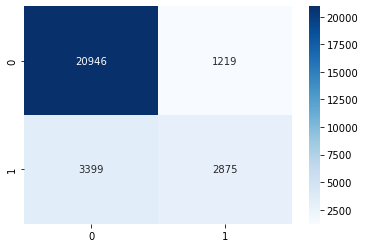

In [58]:
cm = confusion_matrix(y_test, predictionlr)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g');

### Evaluasi Model SVM semua data

In [63]:
print(confusion_matrix(y_test, predictionsvc))
print(classification_report(y_test, predictionsvc))
print(accuracy_score(y_test, predictionsvc))

[[21300   826]
 [ 3810  2503]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22126
           1       0.75      0.40      0.52      6313

    accuracy                           0.84     28439
   macro avg       0.80      0.68      0.71     28439
weighted avg       0.83      0.84      0.82     28439

0.8369844227996766


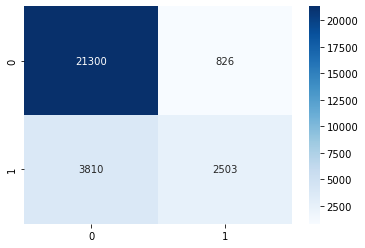

In [64]:
cm = confusion_matrix(y_test, predictionsvc)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g');

### Evaluasi Model SVM data y yes = no

In [60]:
print(confusion_matrix(y_test, predictionsvc2))
print(classification_report(y_test, predictionsvc2))
print(accuracy_score(y_test, predictionsvc2))

[[5031 1322]
 [1695 4703]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      6353
           1       0.78      0.74      0.76      6398

    accuracy                           0.76     12751
   macro avg       0.76      0.76      0.76     12751
weighted avg       0.76      0.76      0.76     12751

0.7633911065798761


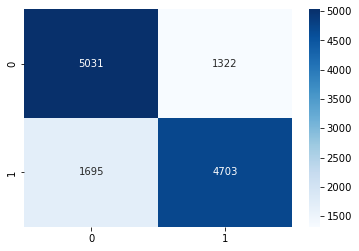

In [61]:
cm = confusion_matrix(y_test, predictionsvc2)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g');

# Model Inference

In [73]:
test_ = {'Location':[3], 'MinTemp':[4.5], 'MaxTemp':[25.1], 'Rainfall':[0.5], 'Sunshine':[4.212322],
         'Evaporation':[3.108971],'WindGustDir':[2], 'WindGustSpeed':[39.0], 'WindDir9am':[3],
         'WindSpeed9am':[8.0], 'Pressure9am':[1000.200000], 'Humidity3pm':[50], 'Temp9am':[8.1],
         'Cloud9am':[8.000000], 'RainToday':[1]}
ytest_ ={'RainTomorrow':[1]}
test_ = pd.DataFrame(test_)
test_

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,Pressure9am,Humidity3pm,Temp9am,Cloud9am,RainToday
0,3,4.5,25.1,0.5,4.212322,3.108971,2,39.0,3,8.0,1000.2,50,8.1,8.0,1


In [74]:
pred_new = lr.predict(x_test)
pred_new

array([0, 0, 0, ..., 0, 0, 0])

3 = cobar
4.5 = mintemp
25.1 = maxtemp
0.5 = hujan ringan


1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi